In [2]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
tax = pd.read_csv('2014tax.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq,Number of individuals,Taxable income or loss3 no.,...,Australian superannuation income stream tax offset no.,Australian superannuation income stream tax offset $,Net medical expenses over the threshold amount tax offset no.,Net medical expenses over the threshold amount tax offset $,Low income tax offset no.,Low income tax offset $,Mature age worker tax offset no.,Mature age worker tax offset $,Termination payment tax offset no.,Termination payment tax offset $
0,801,2,315.00,0,315.00,72,4,0,1201,1201,...,43,193542,16,7159,555,166980,89,37132,52,281508
1,801,6,303.55,0,303.55,65,4,1,1201,1201,...,43,193542,16,7159,555,166980,89,37132,52,281508
2,804,4,250.00,0,250.00,80,4,0,289,289,...,18,58981,5,3038,128,38514,29,12554,12,35432
3,804,2,28.60,50,78.60,57,4,0,289,289,...,18,58981,5,3038,128,38514,29,12554,12,35432
4,810,2,521.50,0,521.50,67,4,1,16956,16956,...,453,1377814,187,116847,9536,2842196,930,382016,497,866774


In [4]:
#have a look at the data
charity_new.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq,Number of individuals,Taxable income or loss3 no.,...,Australian superannuation income stream tax offset no.,Australian superannuation income stream tax offset $,Net medical expenses over the threshold amount tax offset no.,Net medical expenses over the threshold amount tax offset $,Low income tax offset no.,Low income tax offset $,Mature age worker tax offset no.,Mature age worker tax offset $,Termination payment tax offset no.,Termination payment tax offset $
count,26537,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,...,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000,26537.000000
unique,1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.884049,77.894208,3.726344,81.620552,62.462223,3.352640,0.614237,10456.301956,10456.292987,...,251.321137,731378.532200,299.632023,232156.240494,6549.549798,2098431.845687,880.500773,374612.730037,372.813958,1278682.665034
std,NaN,2.549009,70.930426,18.705276,70.744762,14.071706,0.871361,0.486784,8020.746498,8020.741996,...,265.953509,893770.819558,243.638580,195869.231079,5193.632757,1659707.414589,657.578799,282385.944243,340.574985,1016244.859706
min,NaN,0.000000,-414.950000,-150.000000,-500.000000,0.000000,2.000000,0.000000,44.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,9657.000000,4.000000,1557.000000,1.000000,10.000000
25%,NaN,1.000000,37.000000,0.000000,40.000000,54.000000,2.000000,0.000000,4794.000000,4794.000000,...,94.000000,236146.000000,117.000000,85421.000000,2996.000000,948576.000000,420.000000,177776.000000,146.000000,522753.000000
50%,NaN,2.000000,61.000000,0.000000,64.000000,65.000000,4.000000,1.000000,8363.000000,8363.000000,...,189.000000,524541.000000,242.000000,182450.000000,5056.000000,1614086.000000,696.000000,296472.000000,288.000000,1035083.000000
75%,NaN,3.000000,100.000000,0.000000,101.050000,72.000000,4.000000,1.000000,14224.000000,14224.000000,...,310.000000,912825.000000,423.000000,328156.000000,8891.000000,2846496.000000,1207.000000,510166.000000,481.000000,1823559.000000


In [9]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=4, init='random')
est.fit(charity_new)
y_kmeans = est.predict(charity_new)



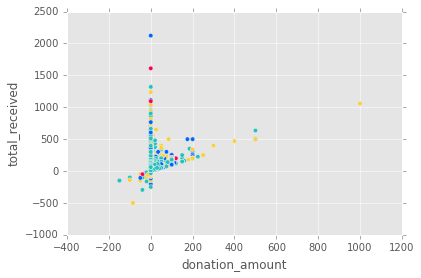

In [14]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#0066ff'])
plt.figure()
charity_new.plot(kind='scatter', x='donation_amount', y='total_received',c=colors[y_kmeans])

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)